
> # LAB 06. EDGE DETECTION AND HOUGH TRANSFORM




## Ex6.1. Save the output images named by the algorithm used respectively in the Instruction 1, 2, 3.

In [15]:
!wget https://aishack.in/static/img/tut/sudoku-original.jpg
from google.colab.patches import cv2_imshow

--2021-11-23 08:52:52--  https://aishack.in/static/img/tut/sudoku-original.jpg
Resolving aishack.in (aishack.in)... 50.116.7.87
Connecting to aishack.in (aishack.in)|50.116.7.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53178 (52K) [image/jpeg]
Saving to: ‘sudoku-original.jpg.3’

sudoku-original.jpg 100%[===================>]  51.93K  --.-KB/s    in 0.1s    

2021-11-23 08:52:52 (370 KB/s) - ‘sudoku-original.jpg.3’ saved [53178/53178]





### 1.Edge detection

Edges are characterized by sudden changes in pixel intensity. To detect edges, we need to go looking for such changes in the neighboring pixels. Come, let’s explore the use of two important edge-detection algorithms available in OpenCV: Sobel Edge Detection and Canny Edge Detection.

Look at Python code in the reference link below to learn more about edge detection algorithms.

Reference:
https://learnopencv.com/edge-detection-using-opencv/

Test image: 
https://aishack.in/static/img/tut/sudoku-original.jpg 

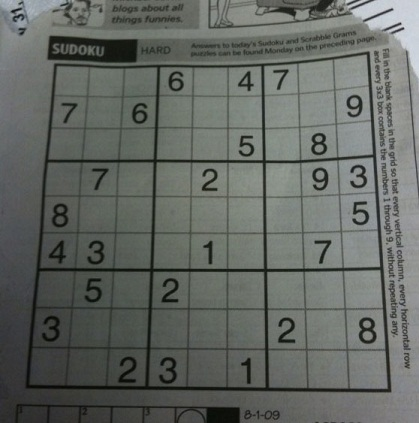

In [16]:
import cv2
img = cv2.imread('sudoku-original.jpg') 
cv2_imshow(img)

In [17]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
# Sobel Edge Detection

#### Display Sobel Edge Detection Images

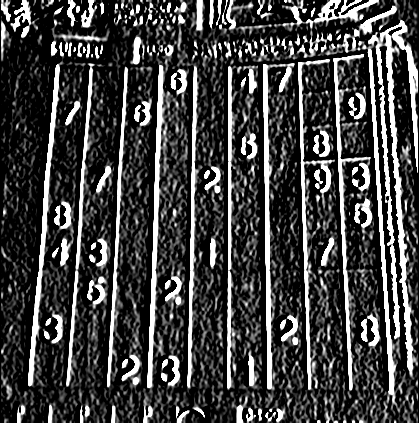

In [18]:
# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
cv2_imshow(sobelx)

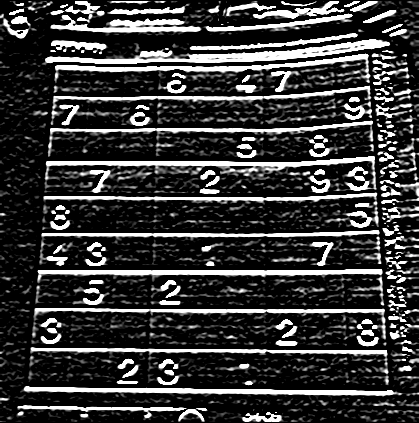

In [19]:
# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
cv2_imshow(sobely)

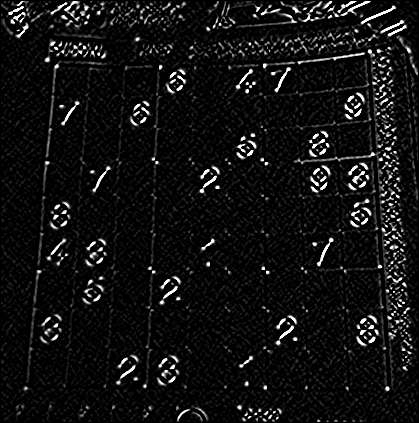

In [20]:
# Combined X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
cv2_imshow(sobelxy)

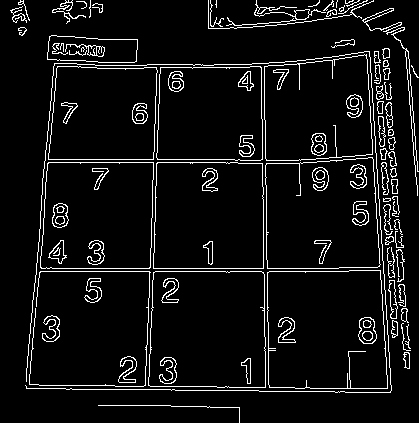

In [21]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)

### 2.Line detection using Hough transform

The Hough Line Transform is a transform used to detect straight lines.. To apply the Transform, first an edge detection pre-processing is desirable.

OpenCV implements two kind of Hough Line Transforms: Standard and Probabilistic Hough Line Transform

**a. The Standard Hough Transform**

It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples (θ,rθ). In OpenCV it is implemented with the function HoughLines()

**b. The Probabilistic Hough Line Transform**
A more efficient implementation of the Hough Line Transform. It gives as output the extremes of the detected lines (x0,y0,x1,y1). In OpenCV it is implemented with the function **HoughLinesP()**

Look at Python code in the reference link below to learn more about Hough Line Transform.

Reference: OpenCV: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

Test image: https://aishack.in/static/img/tut/sudoku-original.jpg 


In [ ]:
import sys
import math
import cv2 as cv
import numpy as np

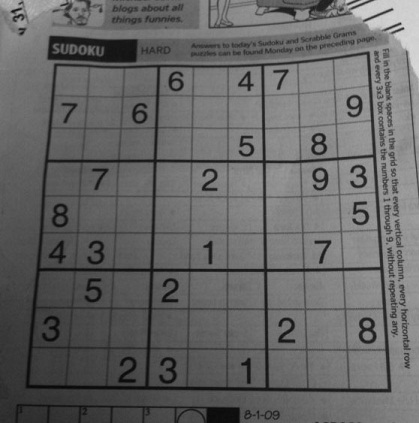

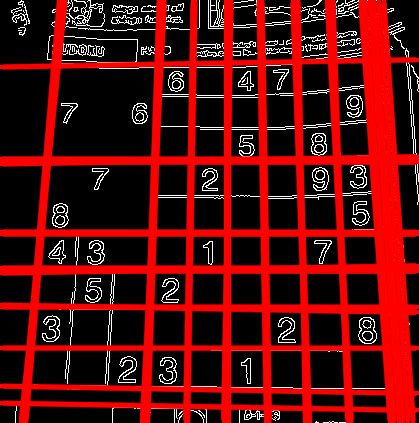

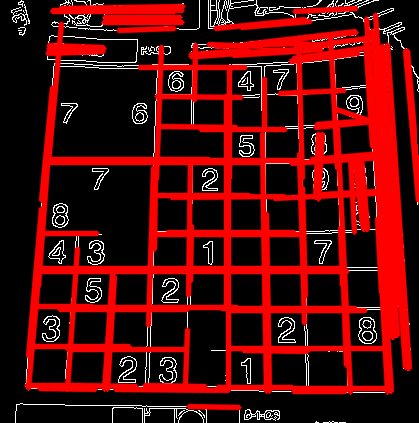

In [29]:
def main(argv):
    default_file = 'sudoku-original.jpg'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    cv2_imshow(src)
    cv2_imshow(cdst)
    cv2_imshow(cdstP)
    return 0
    
if __name__ == "__main__":
    main(sys.argv[1:])

### 3.Circle detection using Hough transform

The Hough Circle Transform works in a roughly analogous way to the Hough Line Transform explained in the previous tutorial. Use the OpenCV function **HoughCircles()** to detect circles in an image.

For sake of efficiency, OpenCV implements a detection method slightly trickier than the standard Hough Transform: The Hough gradient method, which is made up of two main stages. The first stage involves edge detection and finding the possible circle centers and the second stage finds the best radius for each candidate center. 

Look at Python code in the reference link below to learn more about Hough Line Transform.

Reference: OpenCV: https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html

Test image:http://amroamroamro.github.io/mexopencv/opencv/hough_circles_demo_01.png 

In [30]:
!wget http://amroamroamro.github.io/mexopencv/opencv/hough_circles_demo_01.png

--2021-11-23 09:02:52--  http://amroamroamro.github.io/mexopencv/opencv/hough_circles_demo_01.png
Resolving amroamroamro.github.io (amroamroamro.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to amroamroamro.github.io (amroamroamro.github.io)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40079 (39K) [image/png]
Saving to: ‘hough_circles_demo_01.png’

hough_circles_demo_ 100%[===================>]  39.14K  --.-KB/s    in 0.002s  

2021-11-23 09:02:52 (19.0 MB/s) - ‘hough_circles_demo_01.png’ saved [40079/40079]



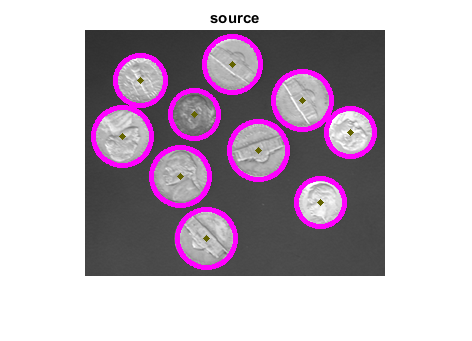

In [34]:
import sys
import cv2 as cv
import numpy as np
def main(argv):
    
    default_file = 'hough_circles_demo_01.png'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv.imread(default_file, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    
    gray = cv.medianBlur(gray, 5)
    
    
    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)
    
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)
    
    
    cv2_imshow( src)
    cv.waitKey(0)
    
    return 0
if __name__ == "__main__":
    main(sys.argv[1:])

## Ex6.2. SuDoKu Grabber in OpenCV

In this exercise, we 'll look at detecting a SuDoKu puzzle. Your task is to detect the grid by using hough line transform. This includes all preprocessing done on the image: filtering the image to ensure we're not affected too much by noise.

Follow the instructions in this article: SuDoKu Grabber in OpenCV: [Grid detection - AI Shack](https://aishack.in/tutorials/sudoku-grabber-opencv-detection/)

Understand C++ code and then change into Python to finish the demo in the article


Sudoku detect grid and warp

In [47]:
!unzip digitRecognizer-v2.model.zip

Archive:  digitRecognizer-v2.model.zip
   creating: digitRecognizer-v2.model/
  inflating: digitRecognizer-v2.model/saved_model.pb  
   creating: digitRecognizer-v2.model/variables/
  inflating: digitRecognizer-v2.model/variables/variables.data-00000-of-00001  
  inflating: digitRecognizer-v2.model/variables/variables.index  


In [49]:
import cv2 as cv
from imutils import perspective
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sudoku_solver as ss
model = tf.keras.models.load_model('digitRecognizer-v2.model')

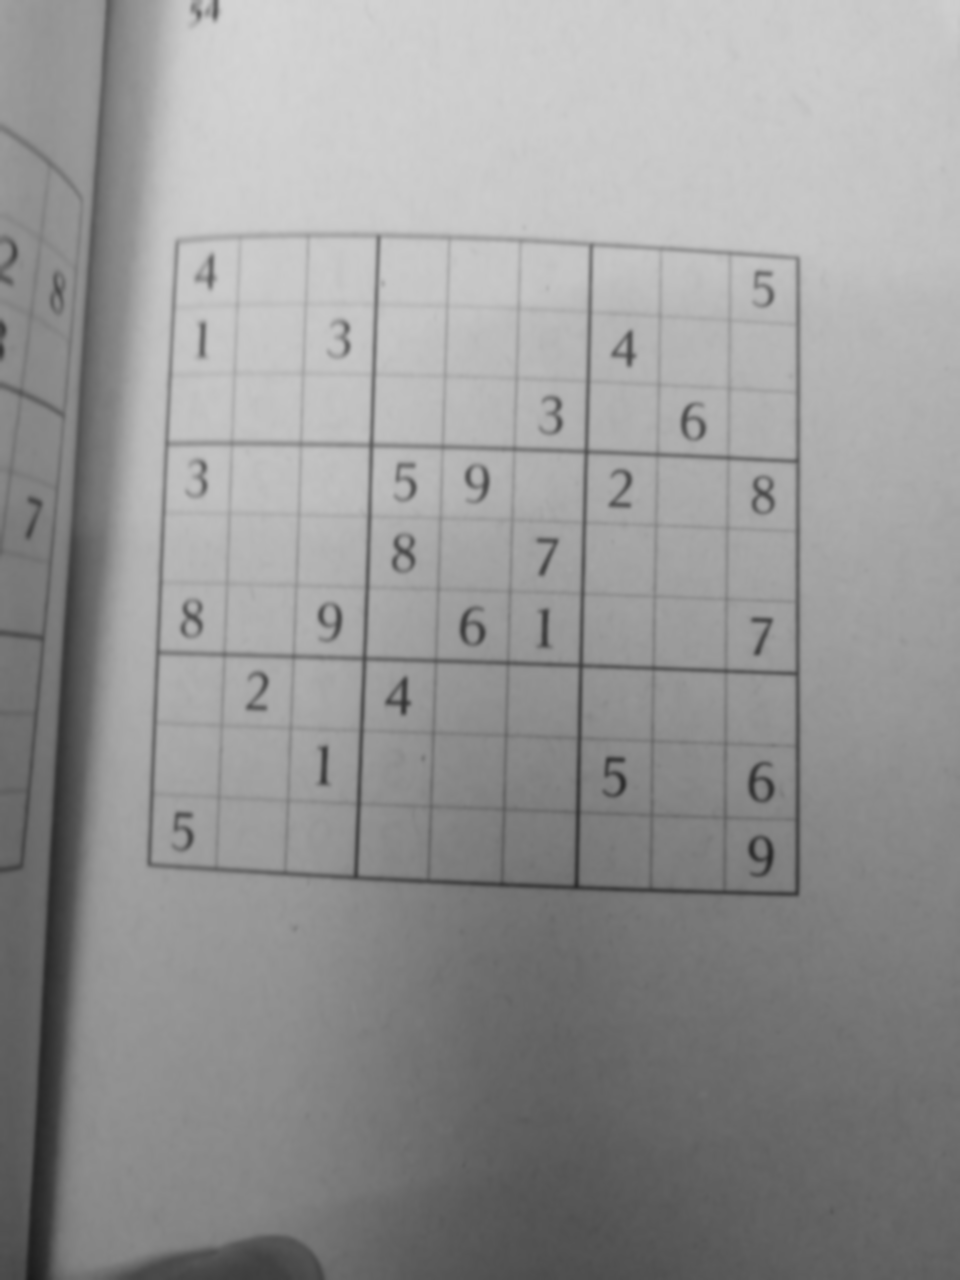

In [87]:
#Load image and apply gaussian blur
img = cv.imread('sudoku.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gblur = cv.GaussianBlur(gray, (9,9), 0)
# cv.imshow('gblur', gblur)
cv2_imshow(gblur)
cv.waitKey(0)
cv.destroyAllWindows()

#### Step 1: Segmenting the SuDoKu puzzle

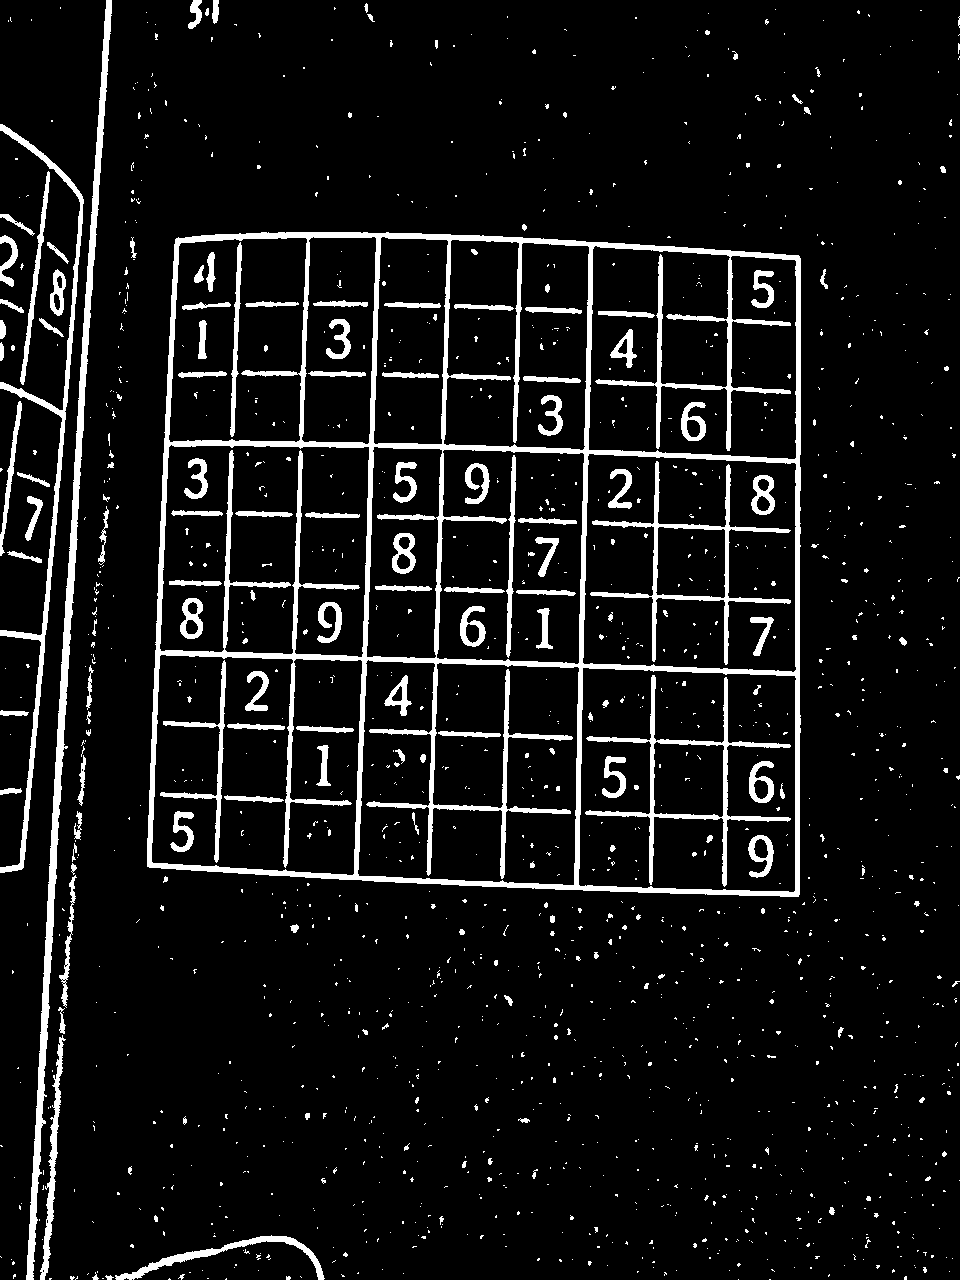

In [88]:
#Apply edge detection, remove lighter lines and dilate edges
thresh = cv.adaptiveThreshold(gblur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 2)
# cv.imshow('thresh', thresh)
cv2_imshow(thresh)

#### Step 2: Detecting the puzzle blob


In [89]:
#Find contours on the image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#### Step 3: Locating the puzzle


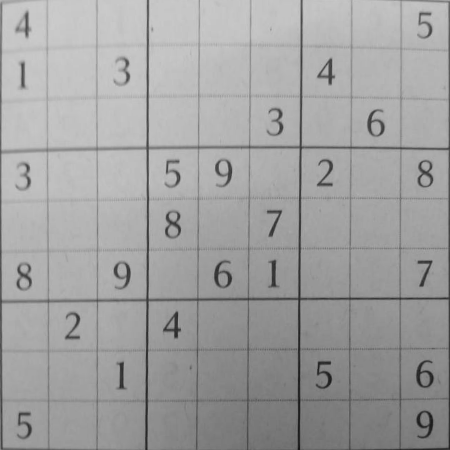

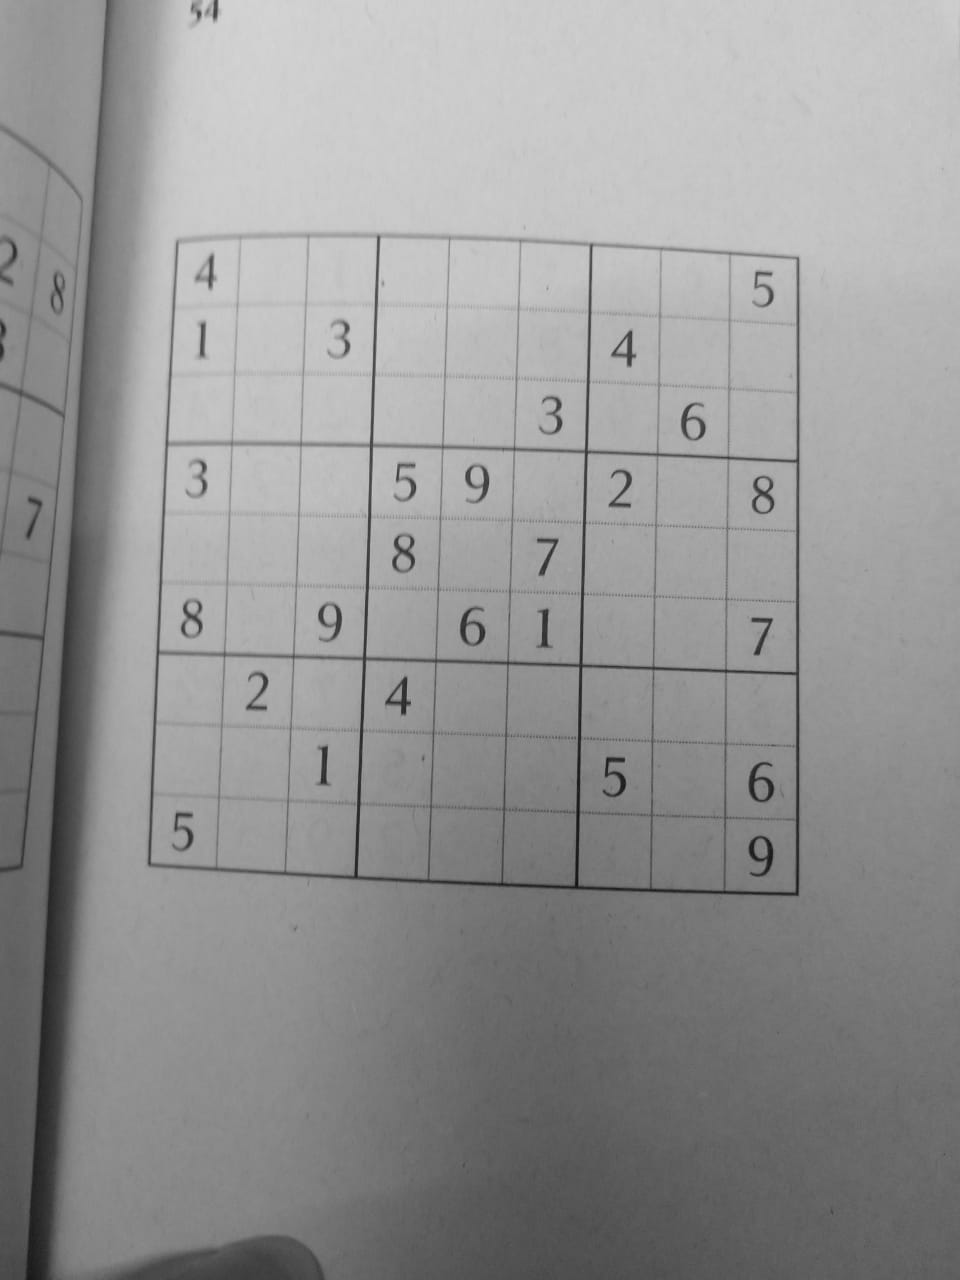

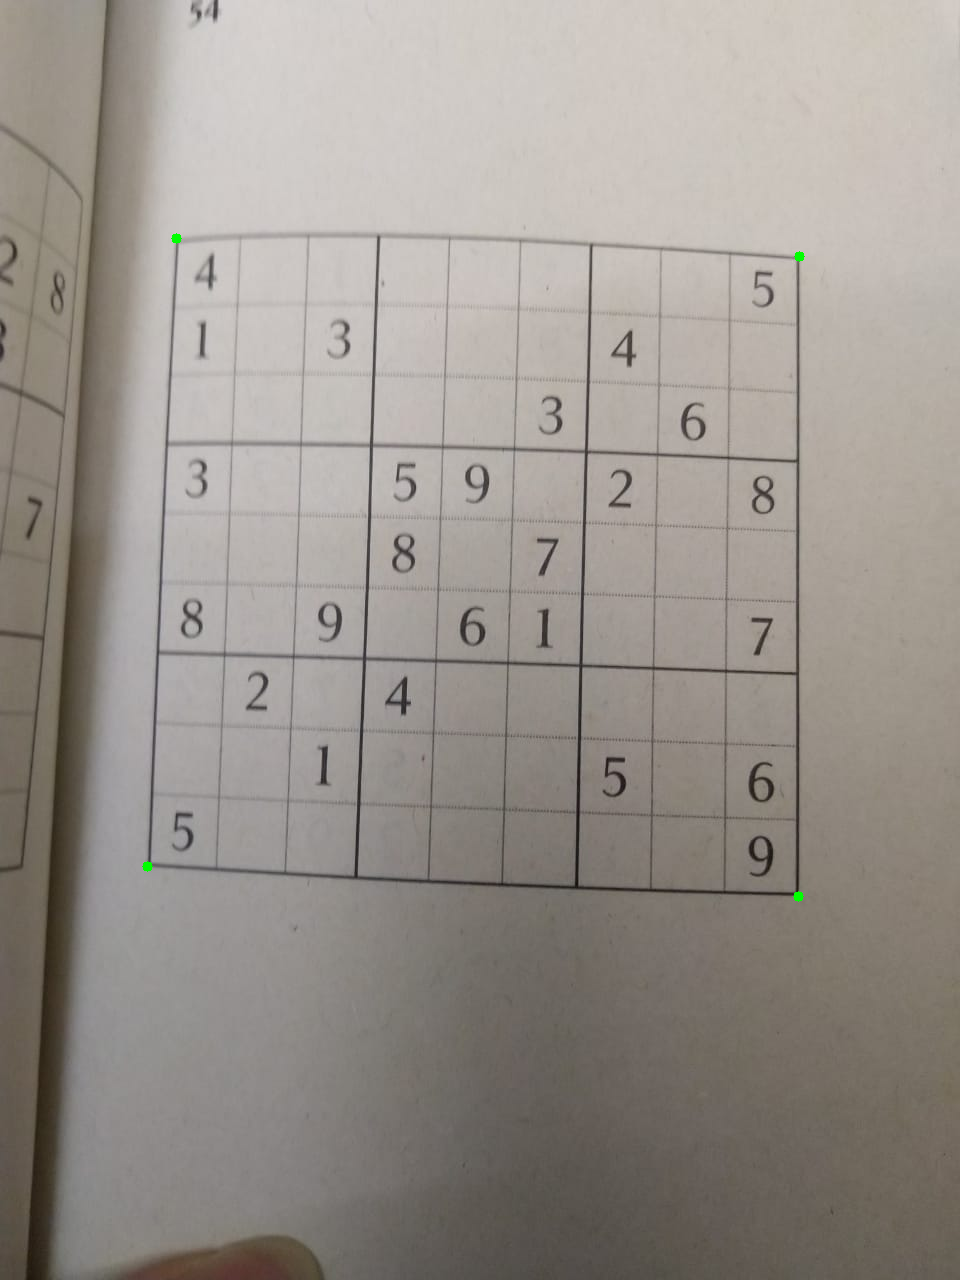

In [90]:
#Find the 4-sided contour with largest area and map it to a square of 600x600
max_area = 0
max_rect = 0
for contour in contours:
    approx = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
    if len(approx) == 4:
        area = cv.contourArea(approx)
        if area > max_area:
            max_area = area
            max_rect = approx
pts1 = np.squeeze(max_rect).tolist()
pts1 = np.float32(pts1)
cv.circle(img, tuple(pts1[0]), 5, (0,255,0), -1)
cv.circle(img, tuple(pts1[1]), 5, (0,255,0), -1)
cv.circle(img, tuple(pts1[2]), 5, (0,255,0), -1)
cv.circle(img, tuple(pts1[3]), 5, (0,255,0), -1)
pts1 = perspective.order_points(pts1)
pts2 = np.float32([[0,0], [450, 0], [450,450], [0,450]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(gray, matrix, (450, 450))
color_result = cv.warpPerspective(img, matrix, (450, 450))

# cv.imshow('result', result)
cv2_imshow(result)
# cv.imshow('contours', gray)
cv2_imshow(gray)
# cv.imshow('image', img)
cv2_imshow(img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [91]:
# Get top-left coordinates of each square
squares = []
for i in range(9):
    for j in range(9):
        p1 = (j*50, i*50)
        squares.append(p1)

#### Step 4: Fixing the image and accessing each cell

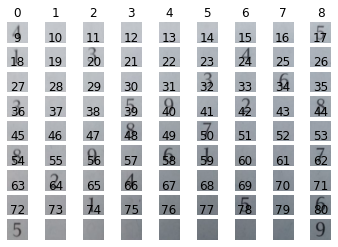

In [92]:
# Crop the square
thresh = cv.adaptiveThreshold(result, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 5)
roi = []
color_roi = []
for x, y in squares:
    roi.append(cv.morphologyEx(thresh[y+5:y+45, x+5:x+45], cv.MORPH_OPEN, np.ones((2,2), np.uint8)))
    color_roi.append(color_result[y+5:y+45, x+5:x+45])
# %matplotlib qt
for i in range(81):
    plt.subplot(9, 9, i+1), plt.imshow(color_roi[i], cmap='gray')
    plt.title(i)
    plt.axis('off')

#### Step 5: Identify the numbers


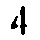

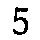

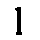

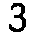

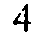

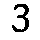

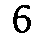

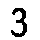

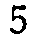

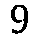

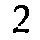

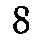

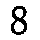

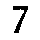

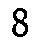

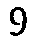

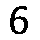

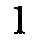

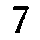

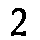

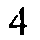

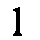

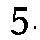

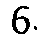

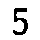

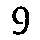

In [93]:
# If the number of white pixels is greater than threshold value then they contain digits
threshold = 50
digits = []
idx = []
for i in range(81):
    num_white_pixels = np.sum(roi[i][10:30, 10:30] == 255)
    if num_white_pixels > threshold:
        digits.append(cv.bitwise_not(roi[i]).reshape(40,40,1))
        idx.append(i)
for digit in digits:
  #  cv.imshow('', digit)
   cv2_imshow(digit)

#### Step 6: Sudoku Solver


[]

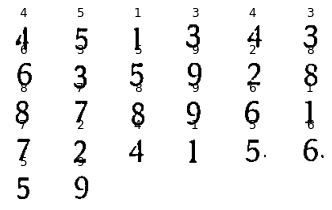

In [94]:
predictions = []
for digit in digits:
    predictions.append(int(np.argmax(model.predict(digit.reshape(-1,40,40,1)/255.), axis=-1)))
plt.figure()
for i in range(len(digits)):
    plt.subplot(6, 6, i+1), plt.imshow(digits[i].reshape(40,40), cmap='gray')
    plt.title(predictions[i])
    plt.axis('off')
plt.plot()

In [95]:
grid = ss.build_grid(predictions, idx)
if ss.solve(grid):
    print(grid)
else:
    print('error')

[[4 6 8 1 7 2 9 3 5]
 [1 9 3 6 8 5 4 7 2]
 [7 5 2 9 4 3 8 6 1]
 [3 7 6 5 9 4 2 1 8]
 [2 1 5 8 3 7 6 9 4]
 [8 4 9 2 6 1 3 5 7]
 [6 2 7 4 5 9 1 8 3]
 [9 3 1 7 2 8 5 4 6]
 [5 8 4 3 1 6 7 2 9]]


In [96]:
for i in range(81):
    if i in idx: continue
    row = int(i/9)
    col = i%9
    x, y = squares[i]
    cv.putText(color_result[y+5:y+45, x+5:x+45], f'{grid[row][col]}', (10,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv.LINE_AA)

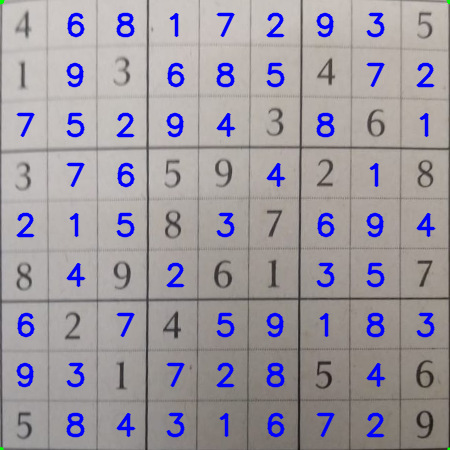

In [97]:
cv2_imshow(color_result)

In [98]:
result = cv.warpPerspective(color_result, matrix, img.shape[:2][::-1], img, cv.WARP_INVERSE_MAP, borderMode=cv.BORDER_TRANSPARENT)

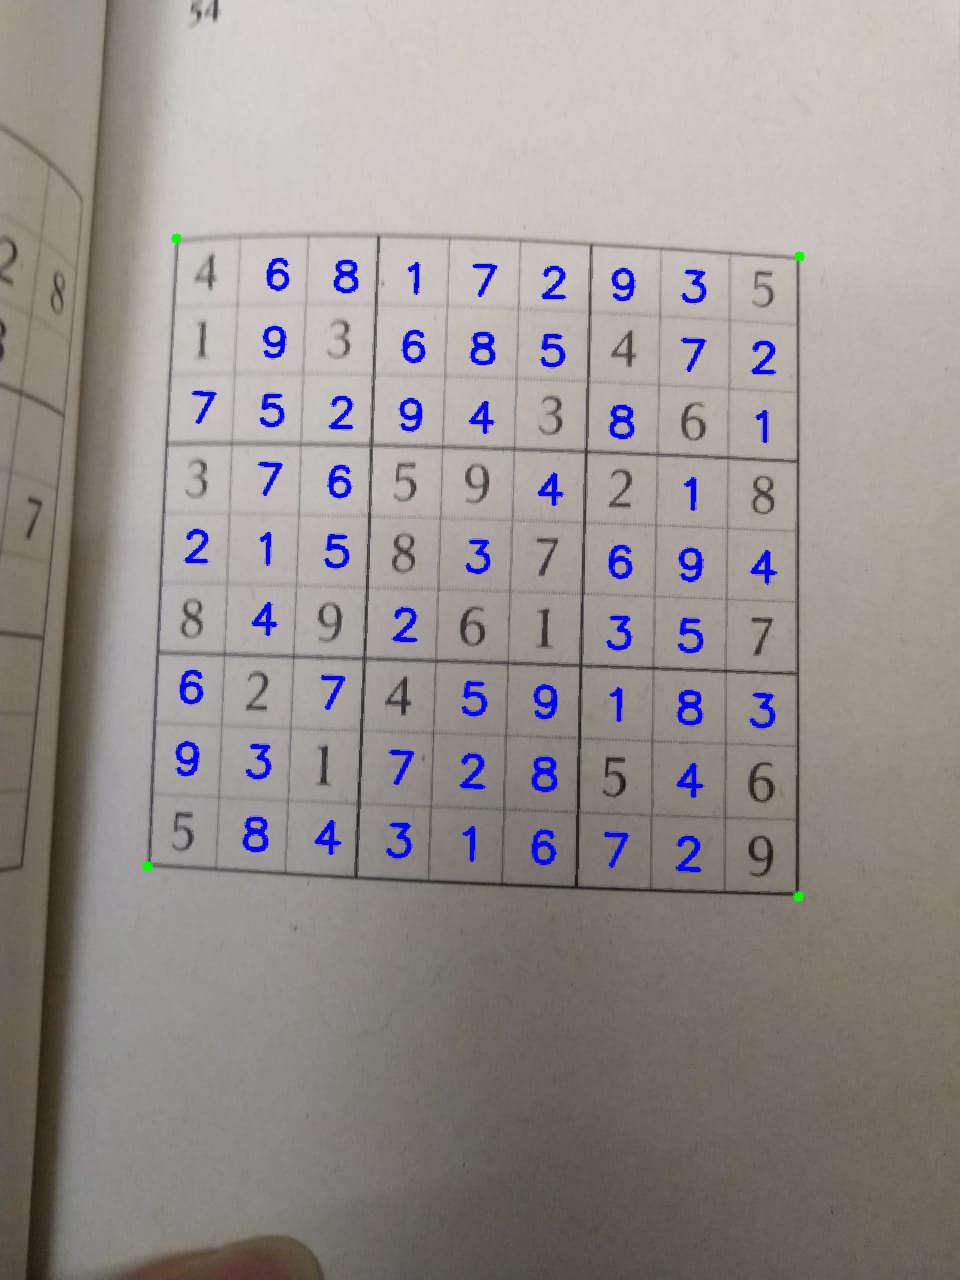

In [99]:
cv2_imshow(img)

 
## HOMEWORK 6


### 1.Improve the result of 6.2 as in this article:



> SuDoKu Grabber in OpenCV: [Extracting the grid - AI Shack](https://aishack.in/tutorials/sudoku-grabber-opencv-extracting-grid/)





### 2.Explore some “Hand detection and finger counting” applications

[Canny Edge Detection Step by Step in Python — Computer Vision | by Sofiane Sahir | Towards Data Science](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)
